# $$L_n(x) = \sum \limits_{j = 0}^{n} f(x_j) \prod \limits_{\substack{i=0\\ i \neq j}}^{n} \frac{x - x_i} {x_j - x_i}$$

## $$f(x) = e^x + \cos{x}$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
def f(x):
    return math.exp(x) + math.cos(x)

In [15]:
def myLagrange(x_ar, y_ar):
    L = 0
    for j in range(len(x_ar)):
        product = 1
        for i in range(len(x_ar)):
            if i != j:
                product *= np.poly1d([1, -x_ar[i]]) / (x_ar[j] - x_ar[i])
        L += y_ar[j] * product
    return L

In [16]:
def L_n(a, b, k):
    x = np.arange(a, b + 0.000001, (b-a)/(k - 1))
    y = [f(k) for k in x]
    return myLagrange(x, y)

In [17]:
x = np.arange(0, 2 + 1/1000, 1/1000)

## 3 узла

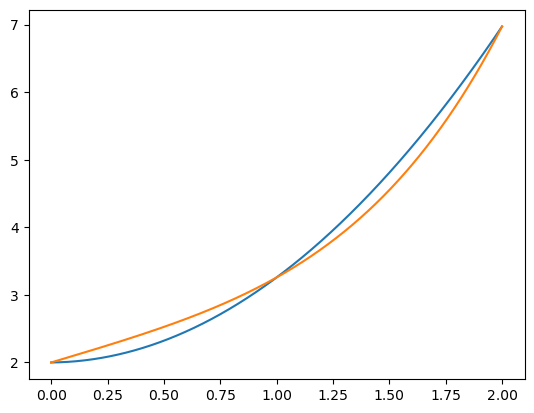

In [19]:
plt.plot(x, L_n(0, 2, 3)(x))
plt.plot(x, [f(k) for k in x])

## 5 узлов

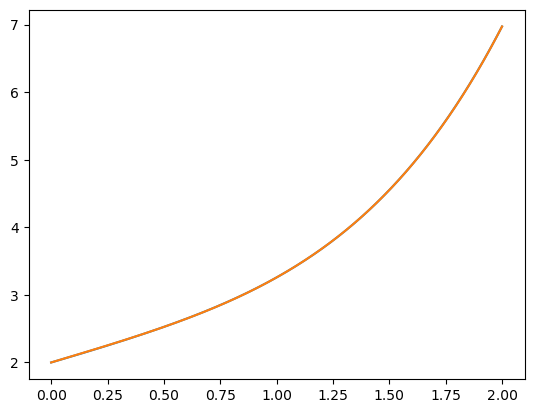

In [20]:
plt.plot(x, L_n(0, 2, 5)(x))
plt.plot(x, [f(k) for k in x])

## 10 узлов

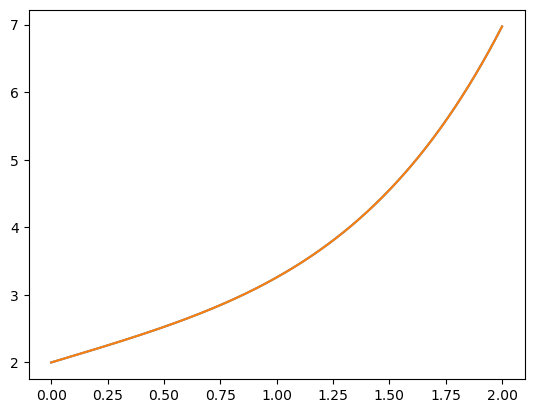

In [21]:
plt.plot(x, L_n(0, 2, 10)(x))
plt.plot(x, [f(k) for k in x])

## 3, 5, 10 узлов на одном графике

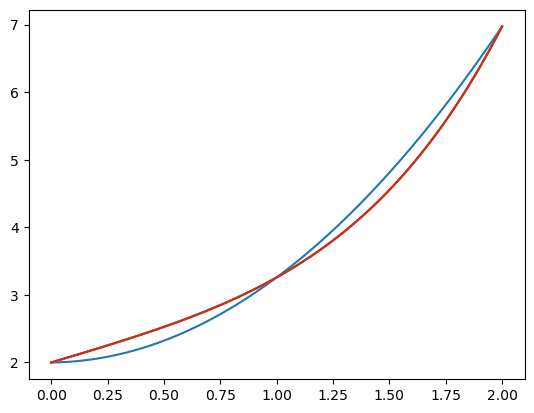

In [22]:
plt.plot(x, L_n(0, 2, 3)(x))
plt.plot(x, [f(k) for k in x])
plt.plot(x, L_n(0, 2, 5)(x))
plt.plot(x, L_n(0, 2, 10)(x))

# $$\max_{x \in [0, 2]}|f(x) - L_n(x)| \le \frac{M_{n+1}} {(n + 1)!}\max_{x \in [0, 2]}|\omega_{n+1}(x)|$$

In [25]:
def err(x_ar, k):
    a, b = min(x_ar), max(x_ar)
    L = L_n(a, b, k)
    y_err = []
    for x in x_ar:
        y_err.append(abs(f(x) - L(x)))
    return y_err
    

## Максимальная погрешность для 3 узлов

In [27]:
max(err(x, 3))

0.2686653150252418

## Максимальная погрешность для 5 узлов

In [28]:
max(err(x, 5))

0.002229047432243725

## Максимальная погрешность для 10 узлов

In [29]:
max(err(x, 10))

9.739808959352558e-09

# $$x_i = \frac{1}{2} \left( (b - a)\cos \left(\frac{(2i + 1)\pi}{2(n + 1)} \right)  + b + a \right), \quad i = 0, 1, ..., n$$

In [ ]:
def opt_node(x):
    a, b = min(x_ar), max(x_ar)
    opt = []
    for i in range(len(x)):
        opt.append((1 / 2) * ((b - a) * math.cos()